Phase 1

In [ ]:
pip install -U bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install transformers==4.36.2
!pip install datasets
!pip install accelerate
!|pip install peft


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.36.2 which is incompatible.


/bin/bash: -c: line 1: syntax error near unexpected token `|'
/bin/bash: -c: line 1: `|pip install peft'


In [ ]:
!pip install pandas numpy spacy matplotlib seaborn scikit-learn transformers
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 113.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
pip install transformers peft accelerate datasets


In [ ]:
pip install langchain faiss-cpu transformers accelerate sentence-transformers pandas


In [ ]:
!pip install openai faiss-cpu pandas scikit-learn sentence-transformers


In [ ]:
pip install -U google-generativeai


In [ ]:
pip install networkx matplotlib


Overall POS Distribution:
{'DET': 162602, 'ADJ': 140827, 'NOUN': 341170, 'ADP': 189110, 'CCONJ': 69582, 'PRON': 132142, 'VERB': 186880, 'PUNCT': 227502, 'PART': 46872, 'PROPN': 169635, 'SCONJ': 28403, 'AUX': 74348, 'ADV': 62354, 'NUM': 20405, 'INTJ': 1069, 'X': 2145, 'SPACE': 3923, 'SYM': 780}


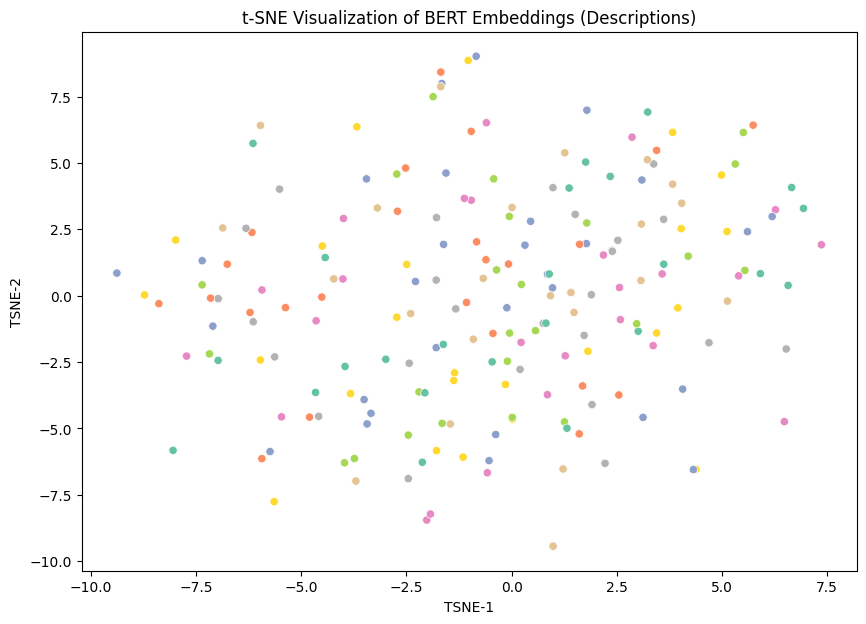

In [ ]:
import pandas as pd
import spacy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import torch

# Load dataset
df = pd.read_csv("/content/books.csv")  # Replace with your CSV file path
df.dropna(subset=["Description"], inplace=True)

# Initialize spaCy
nlp = spacy.load("en_core_web_sm")

# --------- 1. Preprocessing ---------
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return tokens

df["Tokens"] = df["Description"].apply(preprocess)

# --------- 2. POS Tagging ---------
def get_pos_distribution(text):
    doc = nlp(text)
    pos_counts = {}
    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1
        else:
            pos_counts[token.pos_] = 1
    return pos_counts

df["POS_Distribution"] = df["Description"].apply(get_pos_distribution)

# Optional: Aggregate POS tags across the dataset
from collections import Counter
pos_agg = Counter()
df["POS_Distribution"].apply(lambda x: pos_agg.update(x))
print("Overall POS Distribution:")
print(dict(pos_agg))

# --------- 3. BERT Embedding ---------
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

def get_bert_embedding(text):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token
        return cls_embedding.squeeze().numpy()

# Get embeddings (limit to first N descriptions for speed)
N = 200  # Limit for t-SNE visualization
sample_df = df.head(N).copy()
sample_df["BERT_Embedding"] = sample_df["Description"].apply(get_bert_embedding)

# --------- 4. Visualize Embeddings ---------
embeddings = np.stack(sample_df["BERT_Embedding"].values)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=sample_df["Genres"], palette="Set2", legend=False)
plt.title("t-SNE Visualization of BERT Embeddings (Descriptions)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()


Phase 2

In [ ]:
def chain_of_thought(query):
    print("🧠 Chain of Thought Reasoning:")
    print("Step 1: Parse and understand the user query.")
    print("→ Extract keywords: genres/themes + quality filter")

    keywords = ['dystopian', 'time travel', 'war', 'romance', 'future']
    selected = [k for k in keywords if k in query.lower()]
    print(f"Step 2: Matched Keywords: {selected}")

    print("Step 3: Filter books that match description and genres.")
    result = df[df['Description'].str.contains('|'.join(selected), case=False)]

    print("Step 4: Sort by rating and number of ratings.")
    result = result.sort_values(by=['Avg_Rating', 'Num_Ratings'], ascending=False)

    print("Step 5: Recommend top result.")
    return result[['Book', 'Author', 'Genres', 'Avg_Rating']].head(3)

# Example usage
chain_of_thought("Suggest a book that explores dystopian themes and has high reader ratings")


🧠 Chain of Thought Reasoning:
Step 1: Parse and understand the user query.
→ Extract keywords: genres/themes + quality filter
Step 2: Matched Keywords: ['dystopian']
Step 3: Filter books that match description and genres.
Step 4: Sort by rating and number of ratings.
Step 5: Recommend top result.


,Book,Author,Genres,Avg_Rating
8770,The Giver (Giver Quartet) | Book Summary,Summary Elite,[],5.00
5950,The Water Walls,iLana Markarov,"['Fantasy', 'Adventure']",5.00
7643,Lap Dance! For Dystopia,Lysander Arden,"['LGBT', 'Asexual']",4.61


In [ ]:
def tree_of_thought(genre=None, mood=None, min_rating=4.0):
    print("🌲 Tree of Thought Reasoning:")

    print("Step 1: Branch on Genre")
    branch_genre = df[df['Genres'].str.contains(genre.upper())] if genre else df

    print(f"Step 2: Branch on Mood = {mood}")
    if mood:
        branch_genre = branch_genre[branch_genre['Description'].str.contains(mood.lower())]

    print("Step 3: Branch on Rating Threshold")
    branch_filtered = branch_genre[branch_genre['Avg_Rating'] >= min_rating]

    print("Step 4: Return top 3 books")
    return branch_filtered[['Book', 'Author', 'Genres', 'Avg_Rating']].head(3)

# Example usage:
tree_of_thought(genre="Science Fiction", mood="adventure", min_rating=4.3)


🌲 Tree of Thought Reasoning:
Step 1: Branch on Genre
Step 2: Branch on Mood = adventure
Step 3: Branch on Rating Threshold
Step 4: Return top 3 books


,Book,Author,Genres,Avg_Rating


🔗 Graph of Thought Reasoning:
Step 1: Build graph from co-occurring genres.
Step 2: Visualize connections.


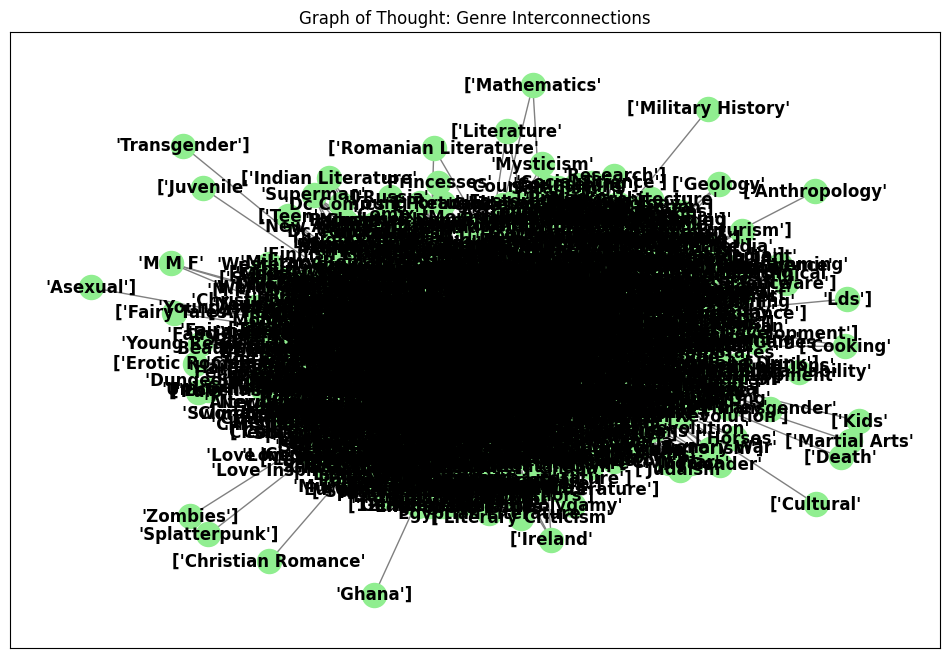

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_of_thought():
    print("🔗 Graph of Thought Reasoning:")
    G = nx.Graph()

    # Build edges between genres in the same book
    for genres in df['Genres']:
        genre_list = [g.strip() for g in genres.split(',')]
        for i in range(len(genre_list)):
            for j in range(i + 1, len(genre_list)):
                G.add_edge(genre_list[i], genre_list[j])

    print("Step 1: Build graph from co-occurring genres.")
    print("Step 2: Visualize connections.")

    plt.figure(figsize=(12, 8))
    nx.draw_networkx(G, with_labels=True, node_color='lightgreen', edge_color='gray', font_weight='bold')
    plt.title("Graph of Thought: Genre Interconnections")
    plt.show()

# Run it
graph_of_thought()


In [ ]:
!pip install plotly
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("/content/books.csv")
df['Genres'] = df['Genres'].str.upper()
df = df[['Book', 'Genres']].dropna()

# Build the graph of genre relationships
G = nx.Graph()
for genres in df['Genres']:
    genre_list = [g.strip() for g in genres.split(',')]
    for i in range(len(genre_list)):
        for j in range(i + 1, len(genre_list)):
            if G.has_edge(genre_list[i], genre_list[j]):
                G[genre_list[i]][genre_list[j]]['weight'] += 1
            else:
                G.add_edge(genre_list[i], genre_list[j], weight=1)

# Filter edges with a minimum weight to reduce clutter
G_filtered = nx.Graph((u, v, d) for u, v, d in G.edges(data=True) if d["weight"] >= 5)

# Get positions
pos = nx.spring_layout(G_filtered, k=0.8, seed=42)

# Create edges
edge_x = []
edge_y = []
for edge in G_filtered.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='rgba(180,180,180,0.5)'),
    hoverinfo='none',
    mode='lines'
)

# Create nodes
node_x = []
node_y = []
labels = []
for node in G_filtered.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    labels.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=labels,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='lightblue',
        size=18,
        line=dict(width=2, color='darkblue')
    )
)

# Final Plot
fig = go.Figure(data=[edge_trace, node_trace],
         layout=go.Layout(
            title='<b>Graph of Thought: Genre Relationships</b>',
            titlefont_size=22,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20, l=5, r=5, t=50),
            plot_bgcolor='white',
            xaxis=dict(showgrid=False, zeroline=False, visible=False),
            yaxis=dict(showgrid=False, zeroline=False, visible=False)
        )
)

fig.show()


Phase 3

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# 1️⃣ Load book data
df = pd.read_csv("/content/books.csv")  # replace with your actual path

# 2️⃣ Create combined book text for embeddings
df["content"] = df.apply(
    lambda row: f"Title: {row['Book']}\nAuthor: {row['Author']}\nGenres: {row['Genres']}\nRating: {row['Avg_Rating']}\nDescription: {row['Description']}",
    axis=1
)






In [ ]:
# 3️⃣ Generate embeddings with sentence-transformers
embed_model = SentenceTransformer("all-MiniLM-L6-v2")
corpus_embeddings = embed_model.encode(df["content"].tolist(), show_progress_bar=True)

# 4️⃣ Build FAISS index for similarity search
dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(corpus_embeddings))

def retrieve_similar_books(query, k=5):
    query_embedding = embed_model.encode([query])
    _, indices = index.search(np.array(query_embedding), k)
    return df.iloc[indices[0]]["content"].tolist()

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
#Load TinyLLaMA model from Hugging Face
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v0.3"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# 6️⃣ RAG Generation Function
def generate_answer_with_context(user_query, context):
    context_text = "\n\n".join(context)

    # Dynamic prompt generation for different types of queries
    prompt = f"""You are a helpful book assistant. Based on the following books, answer the user's query.

User Query: {user_query}

Relevant Books:
{context_text}

Answer:"""

    # Generate the response with a controlled length for relevance
    result = text_generator(prompt, max_new_tokens=128, do_sample=True, temperature=0.7)
    return result[0]["generated_text"]

Device set to use cuda:0


In [ ]:
# 7️⃣ Refined context retrieval function
def retrieve_similar_books(user_query, k=5):
    # Check if the question is asking for all books by a specific author
    if "books by" in user_query.lower():
        author_name = user_query.lower().split("books by")[-1].strip()
        # Filter books by the author name (case insensitive)
        author_books = df[df['Author'].str.contains(author_name, case=False, na=False)]

        if author_books.empty:
            return ["Sorry, no books found for that author."]

        # Return a list of book titles for the given author
        return author_books['content'].tolist()

    # For other queries, retrieve books based on relevance
    else:
        # Retrieve similar books (using an improved similarity measure)
        query_embedding = embed_model.encode([user_query])
        _, indices = index.search(np.array(query_embedding), k)

        return df.iloc[indices[0]]['content'].tolist()

# 8️⃣ Final RAG pipeline with better handling of queries
def book_rag_recommender(user_question):
    context = retrieve_similar_books(user_question, k=5)
    return generate_answer_with_context(user_question, context)

In [ ]:
# 🚀 Example usage
if __name__ == "__main__":
    question = "Which books were written by George Orwell?"
    answer = book_rag_recommender(question)
    print("\n📚 Recommendation:")
    print(answer)

    # Example for a different query
    question2 = "Tell me about a good science fiction book."
    answer2 = book_rag_recommender(question2)
    print("\n📚 Recommendation:")
    print(answer2)


📚 Recommendation:
You are a helpful book assistant. Based on the following books, answer the user's query.

User Query: Which books were written by George Orwell?

Relevant Books:
Title: Animal Farm / 1984
Author: George Orwell
Genres: ['Classics', 'Fiction', 'Dystopia', 'Literature', 'Science Fiction', 'Politics', 'Fantasy']
Rating: 4.3
Description: This edition features George Orwell’s best-known novels—1984 and Animal Farm—with an introduction by Christopher Hitchens.In 1984, London is a grim city where Big Brother is always watching you and the Thought Police can practically read your mind. Winston Smith joins a secret revolutionary organisation called The Brotherhood, dedicated to the destruction of the Party. Together with his beloved Julia, he hazards his life in a deadly match against the powers that be. Animal Farm is Orwell’s classic satire of the Russian Revolution - an account of the bold struggle, initiated by the animals, that transforms Mr. Jones’s Manor Farm into Anima

Phase 5


In [ ]:
pip install peft accelerate datasets evaluate


In [ ]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.52
    Uninstalling langchain-core-0.3.52:
      Successfully uninstalled langchain-core-0.3.52
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.23
    Uninstalling langchain-0.3.23:
      Successfully uninstalled langchain-0.3.23


In [ ]:
!pip install -q transformers datasets peft accelerate bitsandbytes


In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW # Import AdamW from torch.optim
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/books.csv")  # change path if needed
df = df.dropna(subset=["Description"])  # Drop rows without description

# Combine text fields if needed
df["text"] = df["Book"] + " by " + df["Author"] + ". " + df["Description"]

# Create labels (e.g., based on Genre or binning Avg_Rating)
df["label"] = df["Genres"].astype(str)  # You can encode this later

df = df[["text", "label"]]  # Keep only relevant columns
df.head()


,text,label
0,To Kill a Mockingbird by Harper Lee. The unfor...,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice by Jane Austen. Since its ...,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl by Anne Frank. Disco...,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm by George Orwell. Librarian's note...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."


In [ ]:
!pip install datasets

In [ ]:
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

dataset = Dataset.from_pandas(df)

# Split into train/test
dataset = dataset.train_test_split(test_size=0.2)


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_id = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_id)

def tokenize(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

tokenized = dataset.map(tokenize)

num_labels = df["label"].nunique()
model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=num_labels)


Map:   0%|          | 0/7938 [00:00<?, ? examples/s]

Map:   0%|          | 0/1985 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from peft import get_peft_model, LoraConfig, TaskType

config = LoraConfig(
    r=8,                      # Rank
    lora_alpha=16,
    target_modules=["query", "value"],  # Adjust for model type
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS  # Sequence classification
)

model = get_peft_model(model, config)
model.print_trainable_parameters()


trainable params: 6,463,830 || all params: 122,114,988 || trainable%: 5.2932


In [ ]:
!pip install -U transformers


In [ ]:
from transformers import TrainingArguments, Trainer

import os
os.environ["WANDB_DISABLED"] = "true"


args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    logging_dir="./logs",
    learning_rate=2e-4,
    # Remove evaluation_strategy
    save_steps=1000,  # Save model every 1000 steps
    logging_steps=100,  # Log every 100 steps
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["test"],
    tokenizer=tokenizer
)

trainer.train()


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


NameError: name 'model' is not defined

In [ ]:
model.save_pretrained("./book-lora-model")
tokenizer.save_pretrained("./book-lora-model")

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the fine-tuned model and tokenizer
model = AutoModelForCausalLM.from_pretrained("./book-lora-model")
tokenizer = AutoTokenizer.from_pretrained("./book-lora-model")


In [ ]:
# Example question
book_info = "Title: The Great Gatsby\nAuthor: F. Scott Fitzgerald\nGenres: Fiction\nRating: 4.2\nDescription: A story about the American Dream."
question = "Who is the author of this book?"

# Format the input as a prompt
input_text = f"{book_info}\n\nQuestion: {question}\nAnswer:"

# Tokenize the input
inputs = tokenizer(input_text, return_tensors="pt")


In [ ]:
# Generate the answer
outputs = model.generate(inputs['input_ids'], max_length=100)

# Decode the output to get the generated text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Extract the answer (after the "Answer:" part)
answer = generated_text.split("Answer:")[-1].strip()

print(f"Answer: {answer}")


Phase 4

In [ ]:
!pip install openai-whisper
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 45.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803407 sha256=bce91bd6b8fbfdfdf0c71905b3e407b30611520a5e4f864d1603b3de38d1191e
  Stored in directory: /root/.cache/pip/wheels/2f/f2/ce/6eb23db4091d026238ce76703bd66da60b969d70bcc81d5d3a
Successfully built openai-whisper


In [ ]:
!pip install pyttsx3

  Using cached pyttsx3-2.98-py3-none-any.whl.metadata (3.8 kB)
Using cached pyttsx3-2.98-py3-none-any.whl (34 kB)


In [ ]:
!pip install openai-whisper
!pip install pyttsx3



In [ ]:
!apt-get update && apt-get install -y espeak espeak-ng

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jam

In [ ]:
import whisper
import pyttsx3
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# 1️⃣ Load book data
df = pd.read_csv("/content/books.csv")  # replace with your actual path

# 2️⃣ Create combined book text for embeddings
df["content"] = df.apply(
    lambda row: f"Title: {row['Book']}\nAuthor: {row['Author']}\nGenres: {row['Genres']}\nRating: {row['Avg_Rating']}\nDescription: {row['Description']}",
    axis=1
)

# 3️⃣ Generate embeddings with sentence-transformers
embed_model = SentenceTransformer("all-MiniLM-L6-v2")
corpus_embeddings = embed_model.encode(df["content"].tolist(), show_progress_bar=True)

# 4️⃣ Build FAISS index for similarity search
dimension = corpus_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(corpus_embeddings))

# Function to retrieve relevant books based on a query
def retrieve_similar_books(query, k=5):
    query_embedding = embed_model.encode([query])
    _, indices = index.search(np.array(query_embedding), k)
    return df.iloc[indices[0]]["content"].tolist()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# 5️⃣ Load TinyLLaMA model from Hugging Face
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v0.3"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# 6️⃣ RAG Generation Function
def generate_answer_with_context(user_query, context):
    context_text = "\n\n".join(context)
    prompt = f"""You are a helpful book assistant. Based on the following books, answer the user's query.

User Query: {user_query}

Relevant Books:
{context_text}

Answer:"""

    result = text_generator(prompt, max_length=512, do_sample=True, temperature=0.7)
    return result[0]["generated_text"]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.40G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def book_rag_recommender(user_question):
    # Step 1: Retrieve relevant books based on user query
    context = retrieve_similar_books(user_question, k=5)  # Retrieve k relevant books

    # Step 2: Generate answer with context
    response = generate_answer_with_context(user_question, context)

    # Step 3: Clean the response to only include relevant details and remove excess information
    relevant_books = []

    # For each book content in context, find the corresponding book details from the dataframe
    for book_content in context:
        # Find the book row in the dataframe based on the content
        book_info = df[df['content'] == book_content].iloc[0]
        relevant_books.append(f"**Title:** {book_info['Book']}\n**Author:** {book_info['Author']}\n**Rating:** {book_info['Avg_Rating']}\n**Description:** {book_info['Description']}\n")

    # Step 4: Return formatted string of all relevant book details
    return "\n".join(relevant_books)



# 7️⃣ Convert Audio to Text using Whisper
def convert_audio_to_text(audio_file_path):
    model = whisper.load_model("base")  # Load Whisper model
    result = model.transcribe(audio_file_path)  # Transcribe the audio
    print(f"Converted Text: {result['text']}")
    return result['text']


In [ ]:
!apt-get update && apt-get install -y espeak espeak-ng
import whisper
import pyttsx3
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline





# 8️⃣ Text-to-Speech Function (Optional for response output)
def speak_answer(answer):
    engine = pyttsx3.init()
    engine.say(answer)
    engine.runAndWait()

# 9️⃣ Integrating Audio Input with RAG (using Whisper)
def handle_audio_input(audio_file_path):
    # Step 1: Convert Audio to Text using Whisper
    user_question = convert_audio_to_text(audio_file_path)

    if user_question:
        # Step 2: Use the RAG system with the converted text (user's question)
        answer = book_rag_recommender(user_question)

        # Step 3: Output the answer (either as text or speech)
        print("\n📚 Recommendation:")
        print(answer)

        # Optional: Speak the answer aloud
        speak_answer(answer)
    else:
        print("Sorry, I couldn't process the audio correctly.")

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# 🚀 Example Usage
if __name__ == "__main__":
    audio_file_path = "/content/2.in-speech.wav"  # Specify the audio file path

    # Handle audio input and get recommendations
    handle_audio_input(audio_file_path)

Both `max_new_tokens` (=32) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Converted Text:  Who is the author of Romeo and Juliet?

📚 Recommendation:
**Title:** Romeo and Juliet
**Author:** William Shakespeare
**Rating:** 3.74
**Description:** In Romeo and Juliet, Shakespeare creates a violent world, in which two young people fall in love. It is not simply that their families disapprove; the Montagues and the Capulets are engaged in a blood feud.In this death-filled setting, the movement from love at first sight to the lovers’ final union in death seems almost inevitable. And yet, this play set in an extraordinary world has become the quintessential story of young love. In part because of its exquisite language, it is easy to respond as if it were about all young lovers.

**Title:** The Complete Works
**Author:** William Shakespeare
**Rating:** 4.47
**Description:** Tempest	Two Gentlemen of Verona	Merry Wives of Windsor	Measure for Measure	Comedy of Errors	Much Ado About Nothing	Love's Labour's Lost	Midsummer Night's Dream	Merchant of Venice	As You Like It	Ta